(multi-dimensional-image-stacks)=
# 多维图像堆栈
多维图像数据可以以类似于[多通道图像数据](https://nbviewer.jupyter.org/github/BiAPoL/Bio-image_Analysis_with_Python/blob/main/image_processing/03_multi_channel_image_data.ipynb)的方式处理。

## 三维图像堆栈
还有具有三个空间维度的图像：X、Y和Z。在显微镜和医学成像中可以找到典型的例子。让我们来看一个磁共振成像（MRI）数据集：

In [1]:
from skimage.io import imread
from pyclesperanto_prototype import imshow
image_stack = imread('../../data/Haase_MRT_tfl3d1.tif')

In [2]:
image_stack.shape

(192, 256, 256)

我们看到数据确实有三个维度，在这种情况下是192个Z平面和256个X和Y像素。我们可以使用pyclesperanto的```imshow```来显示它：

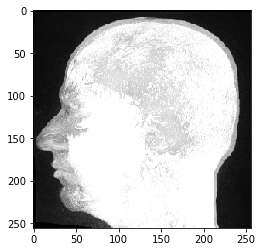

In [3]:
imshow(image_stack)

这个MRI数据集看起来不寻常，因为我们看到的是最大强度投影，这是pyclesperanto默认的三维数据可视化方式。

## 图像切片
我们可以通过指定3D numpy数组中的索引来检查单个图像切片，这次我们使用Matplotlib的```imshow```进行可视化：

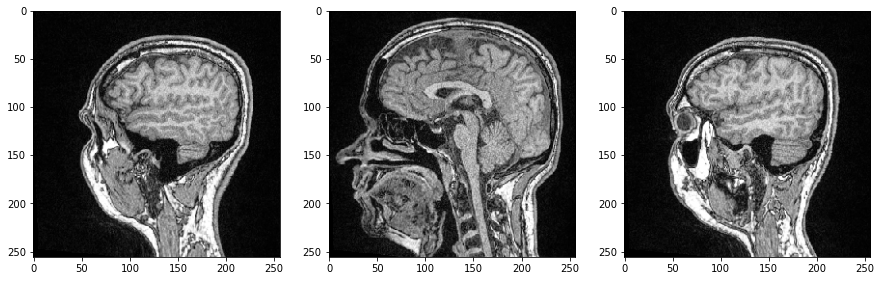

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15,15))

# show three planar images
axs[0].imshow(image_stack[48], cmap='Greys_r')
axs[1].imshow(image_stack[96], cmap='Greys_r')
axs[2].imshow(image_stack[144], cmap='Greys_r');

由于所有三个维度都是空间维度，我们还可以制作垂直于图像平面的切片，对应于[解剖平面](https://en.wikipedia.org/wiki/Anatomical_plane)。为了正确定向图像，我们可以通过在末尾添加`.T`来转置它们的轴。

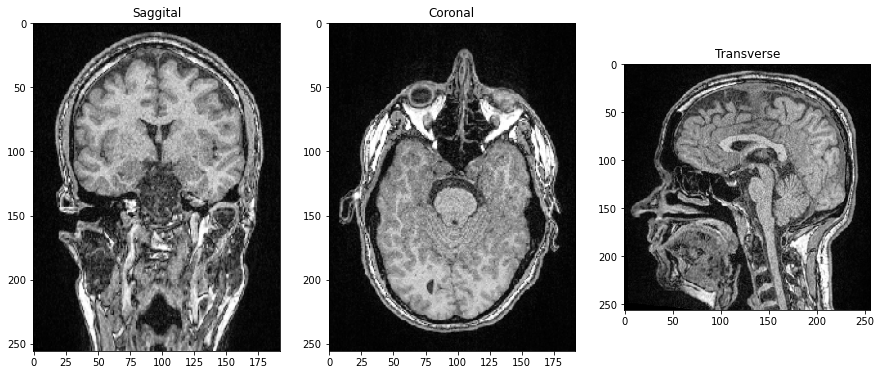

In [5]:
saggital = image_stack[:,:,128].T
coronal = image_stack[:,128,:].T
transverse = image_stack[96]

fig, axs = plt.subplots(1, 3, figsize=(15,15))

# show orthogonal planes
axs[0].imshow(saggital, cmap='Greys_r')
axs[0].set_title('矢状面')

axs[1].imshow(coronal, cmap='Greys_r')
axs[1].set_title('冠状面')

axs[2].imshow(transverse, cmap='Greys_r')
axs[2].set_title('横断面');

## 视频
如果图像数据集有时间维度，我们称之为视频。处理视频的方式类似于多通道图像和图像堆栈。让我们打开一个显示酵母细胞随时间变圆的显微镜数据集。（图像数据由Anne Esslinger，Alberti实验室，MPI CBG提供）

In [6]:
video = imread('../../data/rounding_assay.tif')

video.shape

(64, 512, 512)

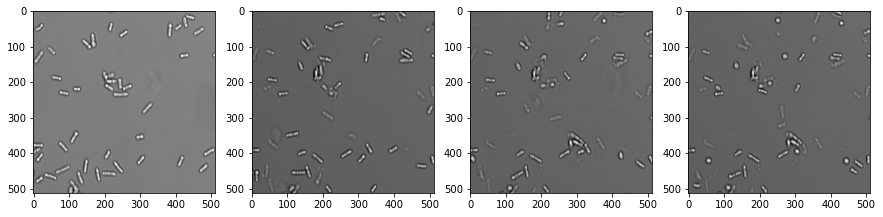

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(15,15))

# show three planar images
axs[0].imshow(video[0], cmap='Greys_r')
axs[1].imshow(video[5], cmap='Greys_r')
axs[2].imshow(video[10], cmap='Greys_r')
axs[3].imshow(video[15], cmap='Greys_r');

## n维数据
高维数据在显微镜领域很常见。为了正确处理它们，必须仔细研究图像数据集具有哪些维度。我们可以使用`mitosis`数据集探索可能性：

In [8]:
mitosis = imread('../../data/mitosis.tif')

mitosis.shape

(51, 5, 2, 196, 171)

提示：在ImageJ/Fiji中打开数据集以了解这些数字代表什么。你可以看到有细胞分裂数据集具有
* 51帧，
* 5个Z切片，
* 2个通道 和
* 171 x 196像素大小。

我们现在获取第一个时间点（索引0）中心平面（索引2）的通道1和2：

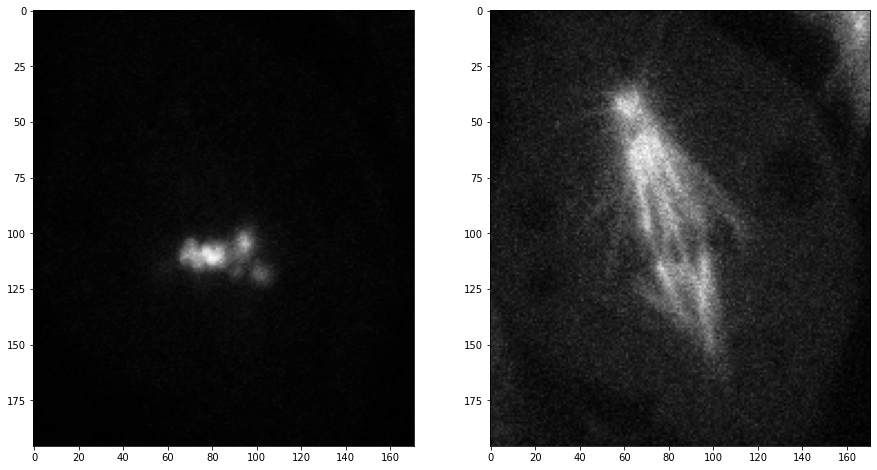

In [9]:
timepoint = 0
plane = 2

channel1 = mitosis[timepoint, plane, 0]
channel2 = mitosis[timepoint, plane, 1]

fig, axs = plt.subplots(1, 2, figsize=(15,15))

axs[0].imshow(channel1, cmap='Greys_r')
axs[1].imshow(channel2, cmap='Greys_r');

## 练习
打开细胞分裂数据集，选择三个时间点并并排显示它们。结果图应该有三列两行。在第一行显示channel1，第二行显示channel2。